In [27]:
import os

print("현재 디렉터리 파일 목록:")
for fname in os.listdir('.'):
    print("  ", fname)

현재 디렉터리 파일 목록:
   app.py
   inbody_final_2_labeled.csv
   inbody_final_labeled.csv
   inbody_full.csv
   label_encoder.pkl
   mlp_classifier_sklearn.pkl
   models.py
   preprocess_and_cluster.pkl
   process_cluster.py
   test.ipynb
   train.py


NameError: name 'data' is not defined

: 

c:\Users\Gyu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


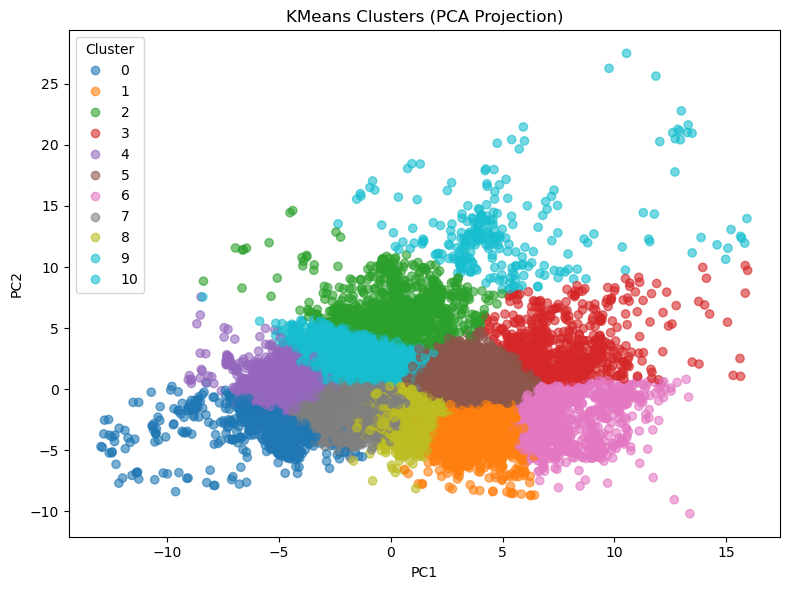

In [28]:
# visualize_clusters.py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) 자동 라벨링된 CSV 불러오기
df = pd.read_csv("inbody_final_labeled.csv", encoding="utf-8-sig")

# 2) 수치형 피처 선택 & 스케일링 (같은 스케일러 사용)
import joblib
pipeline = joblib.load("preprocess_and_cluster.pkl")
scaler = pipeline["scaler"]

num_cols = df.select_dtypes(include=["number"]).columns.drop("auto_label")
X = df[num_cols].values
X_scaled = scaler.transform(X)

# 3) PCA로 2차원 투영
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

# 4) 산점도 그리기
plt.figure(figsize=(8,6))
scatter = plt.scatter(coords[:,0], coords[:,1], c=df["auto_label"], cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


c:\Users\Gyu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


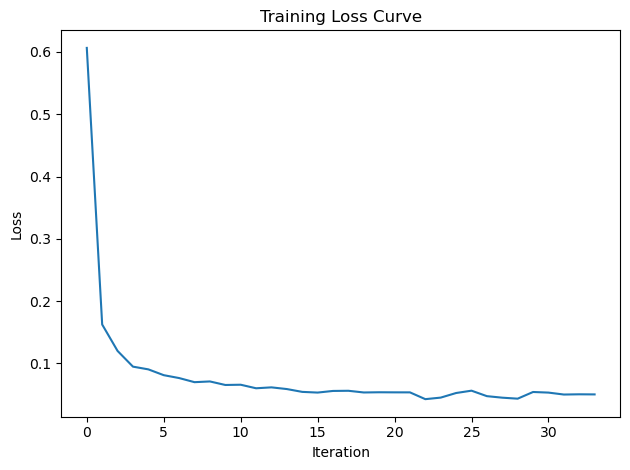

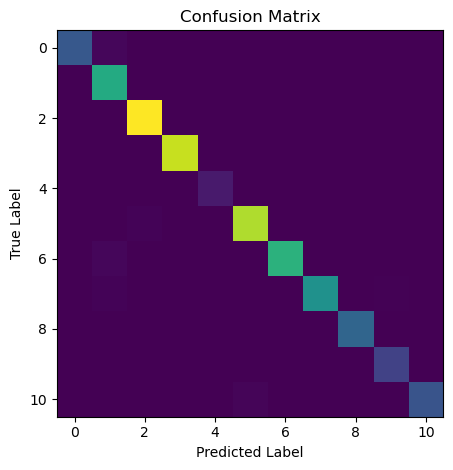

c:\Users\Gyu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


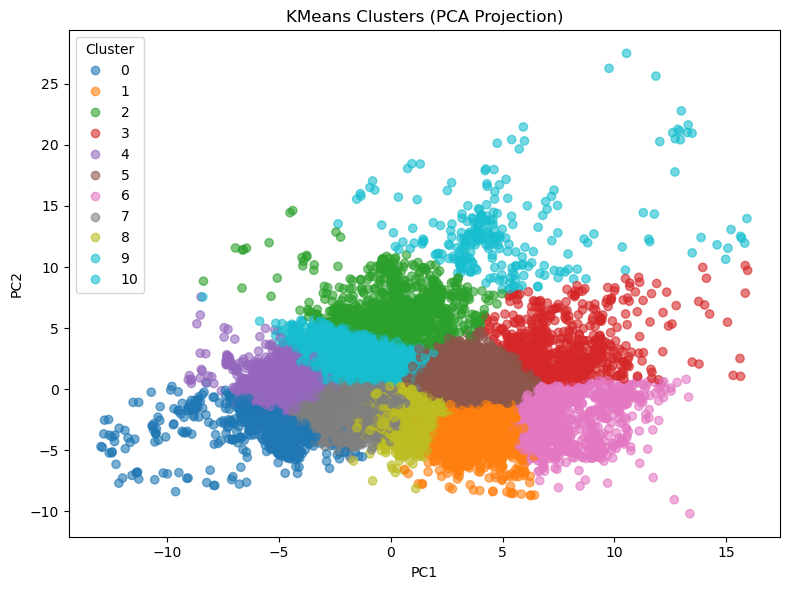

In [29]:
# visualize_clusters.py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) 자동 라벨링된 CSV 불러오기
df = pd.read_csv("inbody_final_labeled.csv", encoding="utf-8-sig")

# 2) 수치형 피처 선택 & 스케일링 (같은 스케일러 사용)
import joblib# visualize_training.py
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1) 파이프라인 및 모델 로드
pipeline = joblib.load("preprocess_and_cluster.pkl")
scaler = pipeline["scaler"]
clf = joblib.load("mlp_classifier_sklearn.pkl")
le = joblib.load("label_encoder.pkl")

# 2) 데이터 로드 및 전처리
df = pd.read_csv("inbody_final_labeled.csv", encoding="utf-8-sig")
num_cols = df.select_dtypes(include=[np.number]).columns.drop("auto_label")
X = scaler.transform(df[num_cols].values.astype(np.float32))
y_true = le.transform(df["body_type"])

# 3) 예측
y_pred = clf.predict(X)

# 4) 학습 손실 곡선
plt.figure()
plt.plot(clf.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

# 5) 혼동 행렬
cm = confusion_matrix(y_true, y_pred)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#plt.xticks(range(len(le.classes_)), le.classes_, rotation=90)
#plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.show()

pipeline = joblib.load("preprocess_and_cluster.pkl")
scaler = pipeline["scaler"]

num_cols = df.select_dtypes(include=["number"]).columns.drop("auto_label")
X = df[num_cols].values
X_scaled = scaler.transform(X)

# 3) PCA로 2차원 투영
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

# 4) 산점도 그리기
plt.figure(figsize=(8,6))
scatter = plt.scatter(coords[:,0], coords[:,1], c=df["auto_label"], cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


In [30]:
print(num_cols)

Index(['성별', '사용자 출생년도', '체중', '총체수분', '단백질', '무기질', '체지방량', '근육량', '제지방량',
       '골격근량', '체지방률', '오른팔 근육량', '왼팔 근육량', '몸통 근육량', '오른다리 근육량', '왼다리 근육량',
       '오른팔 체지방량', '왼팔 체지방량', '몸통 체지방량', '오른다리 체지방량', '왼다리 체지방량', '인바디점수',
       '적정체중', '체중조절', '지방조절', '근육조절', '기초대사량', '복부지방률', '내장지방레벨', '비만도'],
      dtype='object')


In [31]:
   print("num_cols:", num_cols)
   print("num_cols length:", len(num_cols))

num_cols: Index(['성별', '사용자 출생년도', '체중', '총체수분', '단백질', '무기질', '체지방량', '근육량', '제지방량',
       '골격근량', '체지방률', '오른팔 근육량', '왼팔 근육량', '몸통 근육량', '오른다리 근육량', '왼다리 근육량',
       '오른팔 체지방량', '왼팔 체지방량', '몸통 체지방량', '오른다리 체지방량', '왼다리 체지방량', '인바디점수',
       '적정체중', '체중조절', '지방조절', '근육조절', '기초대사량', '복부지방률', '내장지방레벨', '비만도'],
      dtype='object')
num_cols length: 30


In [32]:
print("Expected features:", num_cols)

Expected features: Index(['성별', '사용자 출생년도', '체중', '총체수분', '단백질', '무기질', '체지방량', '근육량', '제지방량',
       '골격근량', '체지방률', '오른팔 근육량', '왼팔 근육량', '몸통 근육량', '오른다리 근육량', '왼다리 근육량',
       '오른팔 체지방량', '왼팔 체지방량', '몸통 체지방량', '오른다리 체지방량', '왼다리 체지방량', '인바디점수',
       '적정체중', '체중조절', '지방조절', '근육조절', '기초대사량', '복부지방률', '내장지방레벨', '비만도'],
      dtype='object')
